# MNIST Multi-Layer Perceptron

In this project we will build out a Multi Layer Perceptron model in Tensorflow to try to classify hand written digits using the famous MNIST data set. The purpose of this project isn't to achieve peak accuracy on the MNIST data set, but rather to demonstrate the underlying concepts of Tensorflow without using contrib.learn.

## Get the Data

We will be using the famous MNIST data set of [handwritten digits](http://yann.lecun.com/exdb/mnist/). 

The images which we will be working with are black and white images of size 28 x 28 pixels, or 784 pixels total. Our features will be the pixel values for each pixel. Either the pixel is "white" (blank with a 0), or there is some pixel value. 

We will try to correctly predict what number is written down based solely on the image data in the form of an array.

Let's get the data:

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


The data is stored in a vector format, although the original data was a 2-dimensional matirx with values representing how dark a pixel is at a given location. We can take a look at this.

In [2]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
type(mnist.train.images)

numpy.ndarray

Let's pick a sample image and visualize it.

In [4]:
mnist.train.images[2].shape

(784,)

We need to put this back into a shape that can be depicted as an image. Let's reshape it.

In [5]:
sample = mnist.train.images[2].reshape(28,28)

We need to import matplotlib.pyplot to view the data as an image.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

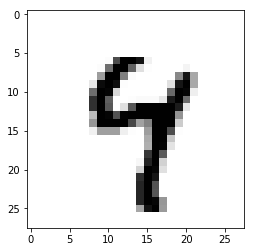

In [7]:
plt.imshow(sample, cmap='Greys')

We'll need to define a few parameters. The parameters here are:

* Learning Rate - How quickly to adjust the cost function.
* Training Epochs - How many training cycles to go through
* Batch Size - Size of the 'batches' of training data

In [8]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

We now have to set parameters which will directly define our Neural Network.

In [9]:
mnist.train.num_examples

55000

In [10]:
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10
n_samples = mnist.train.num_examples

We can now set placeholders for the x and y values we'll be defining soon to use with our model.

In [11]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

Time to build the model. We'll use 2 hidden layers, and a RELU activation technique.

In [12]:
def multilayer_perceptron(x, weights,biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''

    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #weights and biases will be defined later
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

We can now create our weights and biases dicts. We'll use tf's built-in random_normal method to create the random values for our weights and biases. We need these values to be tf.Variable to work.

In [13]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #outputs random weights at a normal distro
    #creating a matrix of these values by n_input rows and n_hidden_1
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [14]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [15]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [16]:
biases

{'b1': <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 'b2': <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>}

Now we can construct the model with the function and values we have defined.

In [17]:
model = multilayer_perceptron(x, weights, biases)

We still need to define the cost and optimazation variables for this model to be evaluated. We'll use Tensorflow's built-in functions for this.

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Now we can initialize all those tf.Variable objects we created earlier. This will be the first thing we run when training our model.

In [19]:
init = tf.global_variables_initializer()

Now we can train our model. We'll be using next_batch for this. Let's look at how this works.

In [20]:
Xsamp,ysamp = mnist.train.next_batch(1)
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

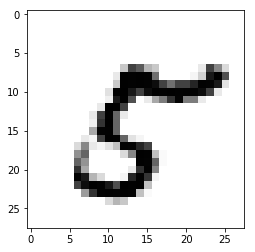

In [21]:
plt.imshow(Xsamp.reshape(28,28), cmap='Greys')

In [22]:
print(ysamp)

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


Here we can see the onehot functionality at work.

Now we can run the session.

In [23]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=159.3263
Epoch: 2 cost=41.6960
Epoch: 3 cost=25.6383
Epoch: 4 cost=18.0160
Epoch: 5 cost=13.0839
Epoch: 6 cost=9.7305
Epoch: 7 cost=7.2755
Epoch: 8 cost=5.3702
Epoch: 9 cost=4.1645
Epoch: 10 cost=3.1113
Epoch: 11 cost=2.2881
Epoch: 12 cost=1.6629
Epoch: 13 cost=1.3251
Epoch: 14 cost=1.1551
Epoch: 15 cost=0.7359
Model has completed 15 Epochs of Training


Tensorflow comes with some built-in functions to help evaluate our model, including tf.equal and tf.cast with tf.reduce_mean. Let's use these to evaluate our model.

In [24]:
correct_predictions = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))

In [25]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In order to get a numerical value for our predictions we will need to use tf.cast to cast the Tensor of booleans back into a Tensor of Floating point values in order to take the mean of it.

In [26]:
correct_predictions = tf.cast(correct_predictions, "float")

In [27]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


Now we use the tf.reduce_mean function in order to grab the mean of the elements across the tensor.

In [28]:
accuracy = tf.reduce_mean(correct_predictions)

In [29]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

It's still a tensor, and we still need to pass our test data and labels through. We can call the MNIST test labels and images and evaluate our accuracy.

In [30]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [31]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

Let's use the built-in eval() method to compare these.

In [32]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9409


94% isn't too bad, but this actually isn't anywhere near as good as it could be. Again, the purpose of this project isn't to achieve peak accuracy on the MNIST data set, but rather to demonstrate the underlying concepts of Tensorflow without using contrib.learn.